In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import display_data

ModuleNotFoundError: No module named 'display_data'

In [ ]:
markers = '001_trial5_right_air_standing_2020-02-16-19-41-59-010.txt'
fname = './001_trial5_right_air_standing_OpenBCI-RAW-2020-02-16_19-38-42.txt'

In [6]:
display_data.display_spec(markers,fname,channel=[1])

labels dataframe ['2020-02-16-19:42:02:720', ' 1581900122720', ' prompt_end', ' right', ' middle finger', ' ']
press enter (trace)
labels dataframe ['datetime(ms)', 'int_time(ms)', 'prompt', 'leftright', 'finger', 'keypressed']
press enter (trace)
labels dataframe columnnames
 ['datetime(ms)', 'int_time(ms)', 'prompt', 'leftright', 'finger', 'keypressed']

['i', 'k']
trace 5


ValueError: could not convert string to float: 'i'

In [5]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
list(df.columns)

['a', 'b']

In [9]:
df[['a','b']].values

array([[1, 2],
       [2, 3],
       [3, 4]])

In [4]:
eeg,timestamps,start,end,df_labels = display_data.load_dta()

In [5]:
timestamps.shape

(98493,)

In [6]:
start_idx = np.where(timestamps > display_data.get_ms(start))[0][0]
end_idx = np.where(timestamps > display_data.get_ms(end))[0][0]
markings = [display_data.get_ms(val) for val in df_labels['timestamp(ms)'].values[::2]]
labels = df_labels.values[:,1]

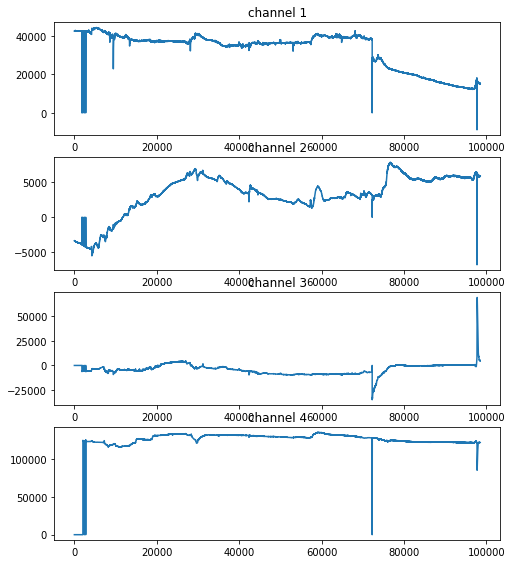

In [7]:
plt.figure(figsize=(8,12))
n = len(eeg.T)+1
for idx,ch in enumerate(eeg.T):
    plt.subplot(n,1,idx+1)
    plt.plot(ch)
    plt.title('channel '+str(idx+1))
plt.show()

In [8]:
df_labels.columns

Index(['timestamp(ms)', ' keypressed'], dtype='object')

In [9]:
eeg.T.shape

(4, 98493)

len ch, len time_interval 21643 21643
len ch, len time_interval 21643 21643
len ch, len time_interval 21643 21643
len ch, len time_interval 21643 21643


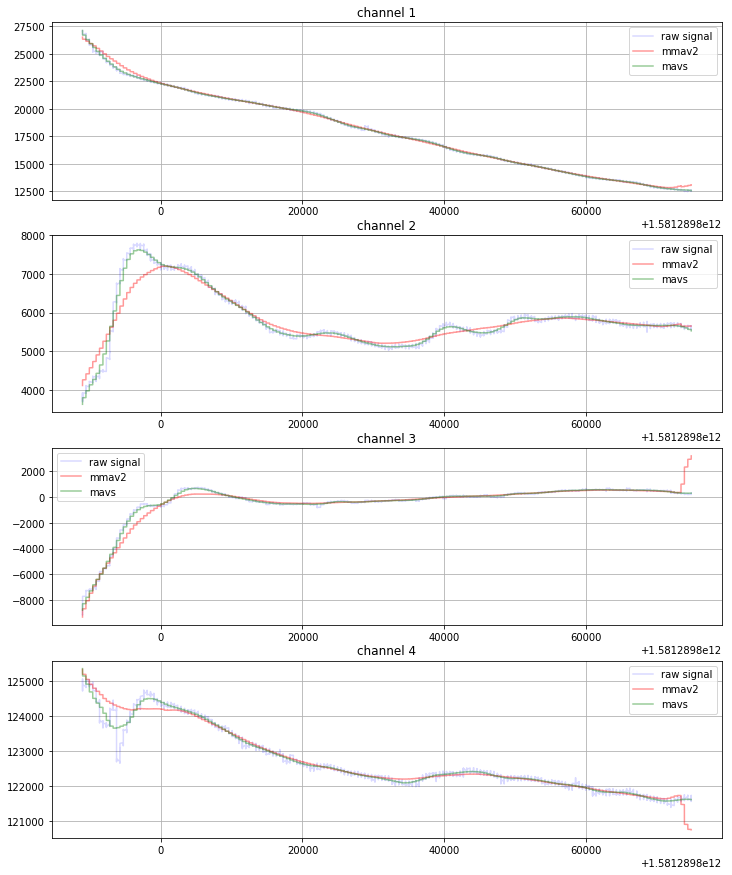

figure saved


<Figure size 432x288 with 0 Axes>

In [10]:
display_data.display_ts()

In [10]:
str([1,2,3])

'[1, 2, 3]'

In [19]:
import datetime

ModuleNotFoundError: No module named 'strftime'

In [20]:
datetime.datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

'2020-02-19_17:19:43'

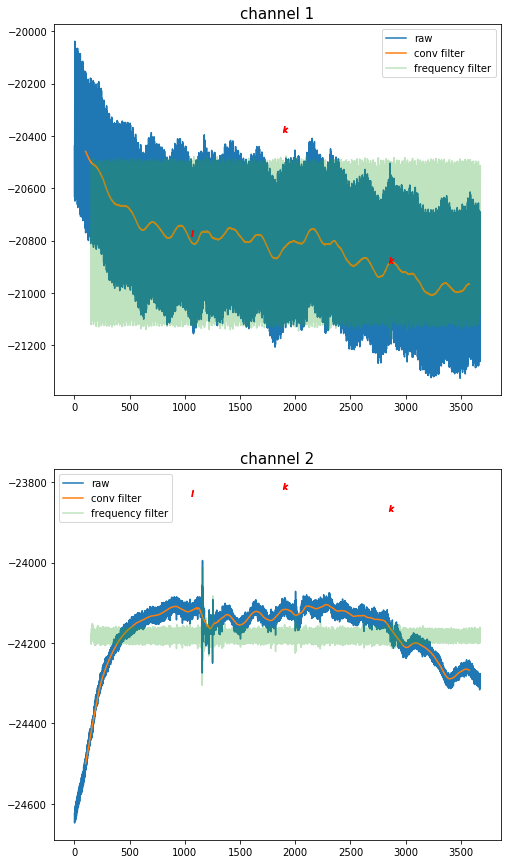

In [3]:
import display_methods
display_methods.plot_ts_2(time_interval=(0.2,0.3),channel=[2,3])

In [8]:
import display_methods
# display_methods.plot_ts()
# display_methods.plot_ts_2()

notch filter removing:57.0-63.0Hz
notch filter removing:57.0-63.0Hz
notch filter removing:57.0-63.0Hz
notch filter removing:57.0-63.0Hz


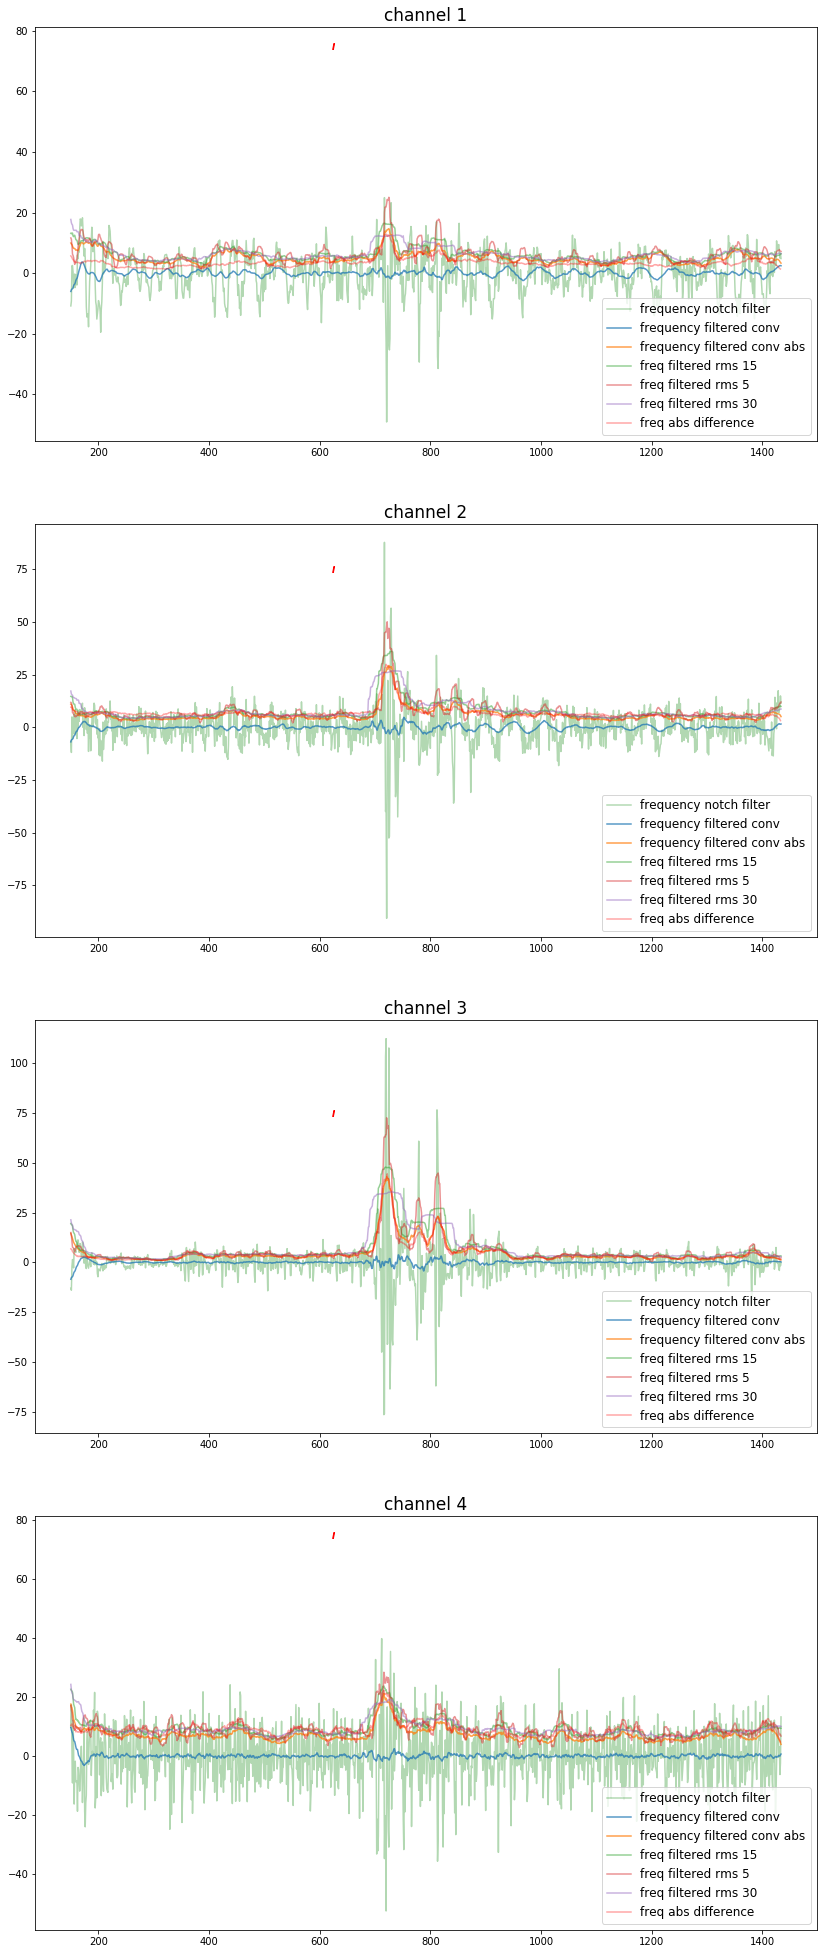

In [2]:
import display_methods
# time_interval=(0.2,0.3)
display_methods.plot_ts_filtered(time_interval=(0.212,0.251),
                                 channel=[1,2,3,4],figsize=(14,35))

messing around with rms etc.

In [33]:
# imports
import load_raw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
from scipy import signal
import display_methods

SAMPLING_FREQ=250

In [34]:
# load data
markers='./001_trial1_right_keyboard_2020-02-16-19-09-10-309.txt'
fname='./001_trial1_right_keyboard_OpenBCI-RAW-2020-02-16_18-59-08.txt'
channel=[1,2,3,4]

lr = load_raw.load_dta(markers,fname,channel)
keypressed = lr['keypressed']
start_idx = keypressed.first_valid_index()
stop_idx = keypressed.last_valid_index()
lr_trimmed = lr.truncate(before=start_idx-500,after=stop_idx+500)
only_keypressed = lr_trimmed[lr_trimmed['keypressed'].notna()]
channels = [i for i in lr.columns if i not in ('timestamp(ms)','keypressed')]
ch1,ch2,ch3 = lr[channels[0]].values,lr[channels[1]].values,lr[channels[2]].values

In [37]:
# takes signal (array), output array of same length
def rms(interval, halfwindow):
    """ performs the moving-window smoothing of a signal using RMS """
    n = len(interval)
    rms_signal = np.zeros(n)
    for i in range(n):
        small_index = max(0, i - halfwindow)  # intended to avoid boundary effect
        big_index = min(n, i + halfwindow)    # intended to avoid boundary effect
        window_samples = interval[small_index:big_index]

        # here is the RMS of the window, being attributed to rms_signal 'i'th sample:
        rms_signal[i] = np.sqrt(sum([s**2 for s in window_samples])/len(window_samples))

    return rms_signal

notch filter removing:57.0-63.0Hz


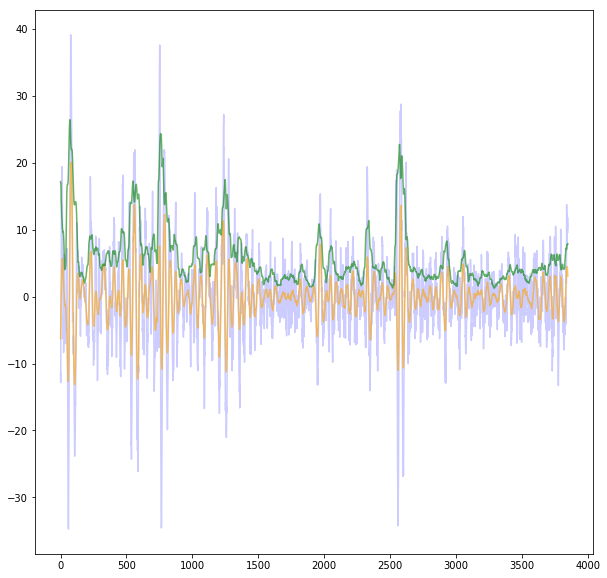

In [41]:
# filter 
freq_filtered = display_methods.filter_signal(ch)
freq_filtered_smoothed = display_methods.mmav2(freq_filtered,window=10)
rms_signal = rms(freq_filtered,15)

interval = (150,4000)

plt.figure(figsize=(10,10))
plt.plot(freq_filtered[interval[0]:interval[1]],color='blue',alpha=.2)
plt.plot(freq_filtered_smoothed[interval[0]:interval[1]],color='orange',alpha=.6)
plt.plot(rms_signal[interval[0]:interval[1]],color='green',alpha=.6)


In [4]:
import load_raw
lr = load_raw.load_dta()
lr.head()

,channel 1,channel 2,channel 3,channel 4,timestamp(ms),keypressed
0,-19410.30,-18125.56,-28213.76,25508.35,1.581898e+12,NaN
1,-19422.86,-18301.96,-28234.25,25617.09,1.581898e+12,NaN
2,-19389.04,-17962.26,-28220.28,25626.86,1.581898e+12,NaN
3,-19374.13,-17722.12,-28198.13,25529.27,1.581898e+12,NaN
4,-19410.57,-18055.60,-28208.26,25486.98,1.581898e+12,NaN


In [40]:
key = lr.loc[lr['keypressed'].notna()]
# key.head()
type(key.iloc[0].name)

numpy.int64

In [31]:
key.columns

Index(['channel 1', 'channel 2', 'channel 3', 'channel 4', 'timestamp(ms)',
       'keypressed'],
      dtype='object')

In [42]:
import os
os.listdir()

['001_trial5_right_air_standing_OpenBCI-RAW-2020-02-16_19-38-42.txt',
 '001_trial1_right_keyboard_OpenBCI-RAW-2020-02-16_18-59-08.txt',
 'display_data_rubbish.py',
 '001_trial2_right_air_OpenBCI-RAW-2020-02-16_19-14-29.txt',
 'load_raw.py',
 'match_labels.ipynb',
 'asdf.png',
 '001_trial1_right_keyboard_2020-02-16-19-09-10-309.txt',
 '001_trial4_right_keyboard_2020-02-16-19-34-54-881.txt',
 '001_trial2_right_air_2020-02-16-19-15-12-263.txt',
 '__pycache__',
 'display_data2.py',
 '001_trial6_right_freestyle_OpenBCI-RAW-2020-02-16_19-45-07.txt',
 '001_trial6_right_freestyle_2020-02-16-19-46-49-822.txt',
 'visualisation_methods.ipynb',
 'README.md',
 '001_trial7_right_air_standing_2020-02-16-19-54-20-731.txt',
 '001_trial3_right_freestyle_2020-02-16-19-28-44-904.txt',
 '.ipynb_checkpoints',
 'djjd.png',
 'display_data_2.py',
 'display_methods.py',
 '001_trial3_right_freestyle_OpenBCI-RAW-2020-02-16_19-27-55.txt',
 '001_trial4_right_keyboard_OpenBCI-RAW-2020-02-16_19-32-59.txt',
 '001_tria

In [2]:
from display_methods import *
take_pictures(channel=[3],figsize=(8,8))

IndexError: too many indices for array